In [14]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data() # unpacking

x_train = tf.keras.utils.normalize(x_train, axis=1) #normalizing the x, and redefing x_train and x_test
x_test = tf.keras.utils.normalize(x_test, axis=1)

## building the architecture for the model

model = tf.keras.models.Sequential() #building a sequential models, picking the sequential model from tensorflow
model.add(tf.keras.layers.Flatten()) # look more into this, he says that he wants to flatten a n-dim array for the beginning
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # layer 1
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # layer 2
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # layer 3 - we want a prob. dist. function, so we use softmax

## model building finished

## metrics for training the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']) # any metric to track, we're going to track 'accuracy'

## metrics finished

model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8611 - loss: 0.4706
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9666 - loss: 0.1104
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9773 - loss: 0.0716


In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9671 - loss: 0.1047
0.0946120023727417 0.97079998254776


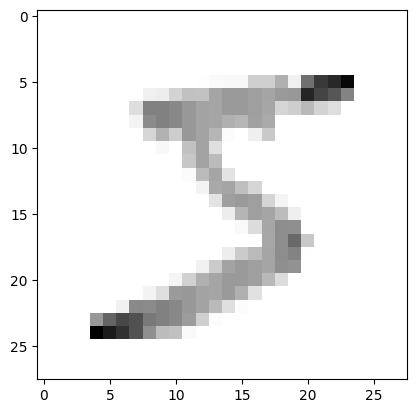

In [17]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
# print(x_train[0])

In [31]:
model.save('epic_reader.keras')

In [32]:
new_model = tf.saved_model.load('epic_reader.h5')

OSError: SavedModel file does not exist at: epic_reader.h5\{saved_model.pbtxt|saved_model.pb}